<a href="https://colab.research.google.com/github/Krazy-68/SentimentTrackr/blob/main/Twitter_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [ ]:
# import the libraries

!pip install clean-text
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
from cleantext import clean
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Twitter API credentials
consumerKey = "we0Drpnvc1FZNazKkiKoFWlGf"
consumerSecret = "OXRvmJwM6ca9k90XMIMoktSCa5XvjNieqJivcfjbOAlmpO6RhH"
accessToken = "501682241-ZG1DshytyxUIUY8FXPoH2AXaDG9d5DQlORemfAzU"
accessTokenSecret = "mxwCYkDjgWG5qWy8ONtVs3j2lxiYSxyberVVa92jmd27z"

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access tokent secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name ="_MukeshAmbani", count = 100, lang = "en", tweet_mode="extended")

# Print the last 5 tweets form the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) “I do not know the word ‘quit.’ Either I never did, or I have abolished it.” 

– Susan Butcher, sled dog racer

2) New goals, new dreams, new successes Everything awaits you. Forget about failures. Correct your mistakes. Success is definitely yours. Happy New Year. #HappyNewYear2022

3) When something is important enough, you do it even if the odds are not in your favor.

-Elon Musk

4) "One of the huge mistakes people make is that they try to force an interest on themselves. You don't choose your passions; your passions choose you."

- Jeff Bezos

5) "The reason most people never reach their goals is that they don't define them, or ever seriously consider them as believable or achievable. Winners can tell you where they are going, what they plan to do along the way, and who will be sharing the adventure with them." 
--



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,“I do not know the word ‘quit.’ Either I never...
1,"New goals, new dreams, new successes Everythin..."
2,"When something is important enough, you do it ..."
3,"""One of the huge mistakes people make is that ..."
4,"""The reason most people never reach their goal..."


In [ ]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text)            #Removing the # symbol
  text = re.sub(r'RT[\s]+', '', text)      #Removing RT
  text = clean(text, no_emoji=True)        #Remove the emojis
  text = re.sub(r"\S*https?:\S*", "", text) #Remove the hyperlink

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,"""i do not know the word 'quit.' either i never..."
1,"new goals, new dreams, new successes everythin..."
2,"when something is important enough, you do it ..."
3,"""one of the huge mistakes people make is that ..."
4,"""the reason most people never reach their goal..."
...,...
68,"""there is one rule for industrialists and that..."
69,"""almost everything worthwhile carries with it ..."
70,your comfort zone is a place where you keep yo...
71,a strong economy begins with a strong well edu...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,"""i do not know the word 'quit.' either i never...",0.000000,0.000000
1,"new goals, new dreams, new successes everythin...",0.474026,0.235065
2,"when something is important enough, you do it ...",0.750000,0.200000
3,"""one of the huge mistakes people make is that ...",0.900000,0.400000
4,"""the reason most people never reach their goal...",0.555556,0.222222
...,...,...,...
68,"""there is one rule for industrialists and that...",0.825000,0.250000
69,"""almost everything worthwhile carries with it ...",0.326136,0.221591
70,your comfort zone is a place where you keep yo...,1.000000,0.000000
71,a strong economy begins with a strong well edu...,0.555556,0.322222


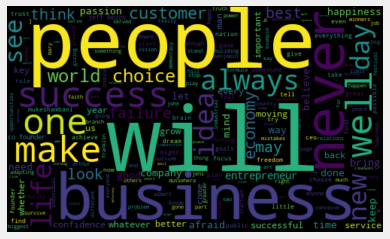

In [ ]:
from pandas.core.common import random_state
# Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"""i do not know the word 'quit.' either i never...",0.000000,0.000000,Neutral
1,"new goals, new dreams, new successes everythin...",0.474026,0.235065,Positive
2,"when something is important enough, you do it ...",0.750000,0.200000,Positive
3,"""one of the huge mistakes people make is that ...",0.900000,0.400000,Positive
4,"""the reason most people never reach their goal...",0.555556,0.222222,Positive
...,...,...,...,...
68,"""there is one rule for industrialists and that...",0.825000,0.250000,Positive
69,"""almost everything worthwhile carries with it ...",0.326136,0.221591,Positive
70,your comfort zone is a place where you keep yo...,1.000000,0.000000,Neutral
71,a strong economy begins with a strong well edu...,0.555556,0.322222,Positive


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) new goals, new dreams, new successes everything awaits you. forget about failures. correct your mistakes. success is definitely yours. happy new year. happynewyear2022

2) when something is important enough, you do it even if the odds are not in your favor.
-elon musk

3) "one of the huge mistakes people make is that they try to force an interest on themselves. you don't choose your passions; your passions choose you."
- jeff bezos

4) "the reason most people never reach their goals is that they don't define them, or ever seriously consider them as believable or achievable. winners can tell you where they are going, what they plan to do along the way, and who will be sharing the adventure with them."
--

5) "don't limit yourself. many people limit themselves to what they think they can do. you can go as far as your mind lets you. what you believe, remember, you can achieve."
mary kay ash, founder mary kay cosmetics

6) "success is not the key to happiness. happiness is the key to su

In [ ]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) "don't play games that you don't understand, even if you see lots of other people making money from them."
tony hsieh, ceo of zappos

2) "the secret of change is to focus all your energy not on fighting the old but on building the new."
socrates, father of western philosophy

3) "if you tune it so that you have zero chance of failure, you usually also have zero chance of success. the key is to look at ways for when you get to your failure checkpoint, you know to stop."
-reid hoffman,
(co-founder of linkedin)

4) ganeshchaturthi celebrations this year might be different from the usual but the spirit and faith will always remain the same.
may this festival bring a new beginning for all of us.
happyganeshchaturthi

5) "[don't] let anyone convince you that your dream, your vision to be an entrepreneur, is something that you shouldn't do. what often happens is that people who are well meaning, who really care for us, are afraid for us and talk us out of it."
-cathy hughes
(entrepreneur)


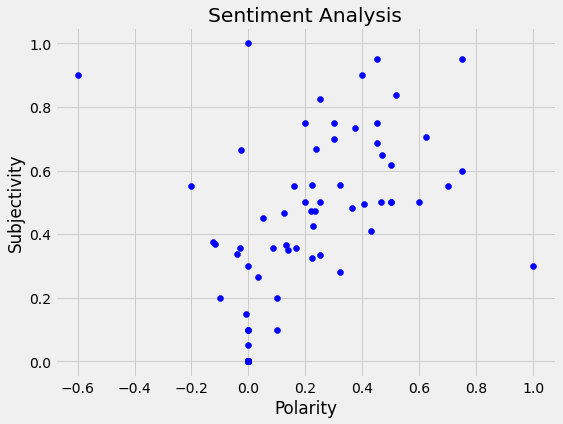

In [ ]:
# Plot the poolarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100 , 1)

61.6

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100 , 1)

12.3

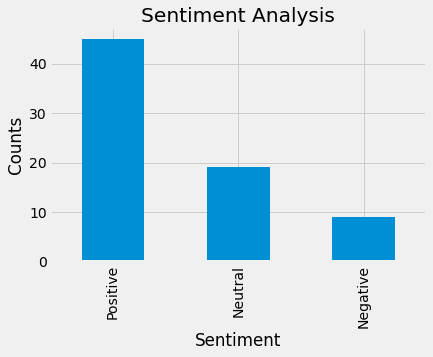

In [ ]:
# Show the value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()